# Arboles de Clasificacion y Regresion 

In [11]:
from sklearn.datasets import load_iris
from sklearn import tree

from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

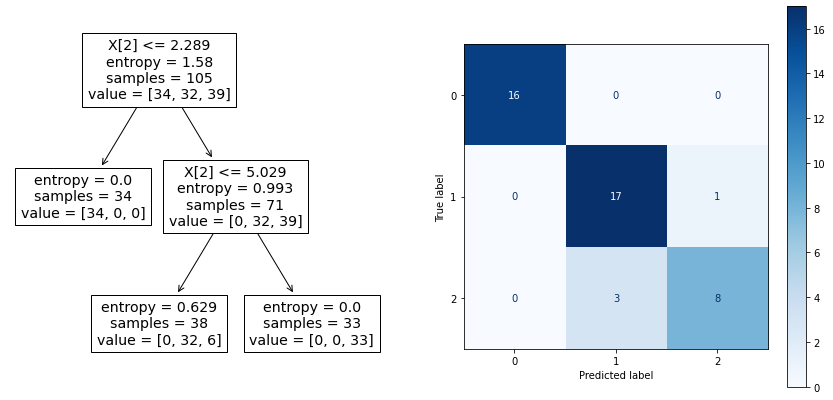

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,roc_auc_score

clf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='random',max_depth=2)

clf = clf.fit(X_train, y_train)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
tree.plot_tree(clf,ax=ax1)
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues,ax=ax2)
plt.show()

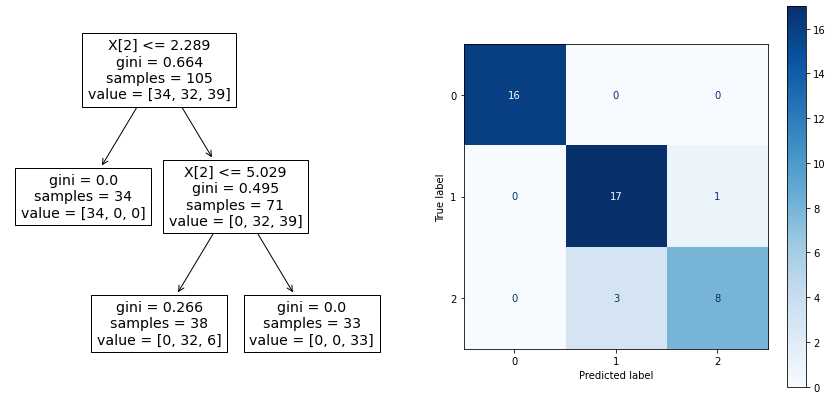

In [26]:
clf = tree.DecisionTreeClassifier(random_state=0,criterion='gini',splitter='random',max_depth=2)
iris = load_iris()

clf = clf.fit(X_train,y_train)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
tree.plot_tree(clf,ax=ax1)
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues,ax=ax2)
plt.show()

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo de arbol para predecir la supervivencia de un paciente infectado con COVID usando datos epidemiologicos (Datos obtenidos desde [1]).
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo usando ensambles.

[1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7306186/#!po=54.1667

In [20]:
import pandas as pd

patient_info=pd.read_csv('data/datasets_527325_1332417_PatientInfo.csv')

In [27]:
patient_info['confirmed_date']=pd.to_datetime(patient_info['confirmed_date'],format='%Y/%m/%d')
patient_info['released_date']=pd.to_datetime(patient_info['released_date'],format='%Y/%m/%d')
patient_info['deceased_date']=pd.to_datetime(patient_info['deceased_date'],format='%Y/%m/%d')

patient_info['sex'] = patient_info['sex'].astype('category')
patient_info['age'] = patient_info['age'].astype('category')
patient_info['infection_case'] = patient_info['infection_case'].astype('category')

In [28]:
patient_info.drop(columns=['country','province','city','infected_by','contact_number','symptom_onset_date'],inplace=True)

In [29]:
patient_info['state'] = patient_info['state'].astype('category')

In [30]:
data=patient_info.loc[(patient_info['state']=='released') | (patient_info['state']=='deceased')]

In [31]:
data.head()

,patient_id,sex,age,infection_case,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,overseas inflow,2020-01-23,2020-02-05,NaT,released
1,1000000002,male,30s,overseas inflow,2020-01-30,2020-03-02,NaT,released
2,1000000003,male,50s,contact with patient,2020-01-30,2020-02-19,NaT,released
3,1000000004,male,20s,overseas inflow,2020-01-30,2020-02-15,NaT,released
4,1000000005,female,20s,contact with patient,2020-01-31,2020-02-24,NaT,released


In [284]:
days_released=data.loc[data['state']=='released']['released_date']-data.loc[data['state']=='released']['confirmed_date']

In [285]:
days_deceased=data.loc[data['state']=='deceased']['deceased_date']-data.loc[data['state']=='deceased']['confirmed_date']

In [286]:
df_days=data.join(days_deceased.fillna(method='bfill').fillna(method='ffill').rename('no_days'))

In [287]:
df_days.loc[df_days.state=='released','no_days']=days_released.copy()

In [288]:
df_days.drop(columns=['confirmed_date','released_date','deceased_date'],inplace=True)

In [289]:
s=df_days.loc[df_days.state=='released',:].isna().any(axis=1)
index_nan=[i for i in s.index if s[i]]

In [290]:
df_days.drop(index_nan,inplace=True)

In [291]:
df_days.loc[df_days.state=='released',:].isna().sum()

patient_id        0
sex               0
age               0
infection_case    0
state             0
no_days           0
dtype: int64

In [292]:
df_days.loc[df_days.state=='deceased',:].isna().sum()

patient_id         0
sex                3
age                3
infection_case    42
state              0
no_days            0
dtype: int64

In [294]:
df_days.fillna(method='ffill',inplace=True)

In [237]:
#df_days.drop(columns=['infection_case'],inplace=True)

In [295]:
df_days.loc[df_days.state=='deceased',:].isna().sum()

patient_id        0
sex               0
age               0
infection_case    0
state             0
no_days           0
dtype: int64

# Arbol de Clasificacion

In [296]:
from sklearn.model_selection import train_test_split

X=df_days[['sex','age','infection_case']]
X=pd.get_dummies(X)
X['no_days'] = df_days['no_days'].dt.days.copy()
y=df_days['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

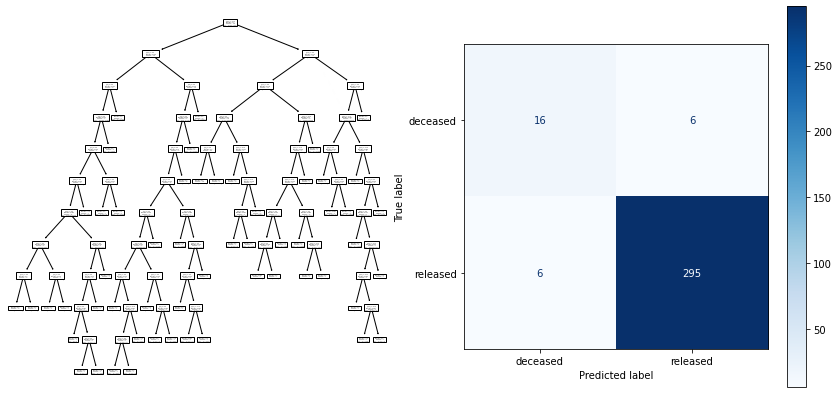

In [297]:
clf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best',class_weight='balanced')

clf = clf.fit(X_train, y_train)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
tree.plot_tree(clf,ax=ax1)
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues,ax=ax2)
plt.show()

In [317]:
from sklearn.metrics import classification_report

y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    deceased       1.00      0.45      0.62        22
    released       0.96      1.00      0.98       301

    accuracy                           0.96       323
   macro avg       0.98      0.73      0.80       323
weighted avg       0.96      0.96      0.96       323

